In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [4]:
!pip install librosa

  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [librosa]


In [2]:
random_file_name = "/Users/cartneyhlauffin/Downloads/Data/genres_original/blues/blues.00000.wav"

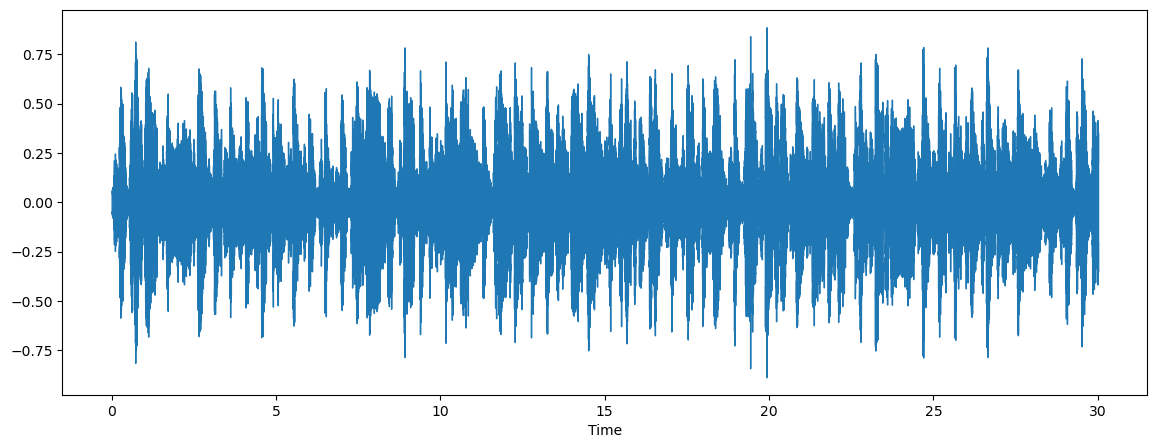

In [3]:
y,sr = librosa.load(random_file_name,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [4]:
y.shape

(1323588,)

In [9]:
from IPython.display import Audio
Audio(data=y,rate=sr)

In [11]:
y

array([ 0.00734921,  0.01335782,  0.01657648, ..., -0.07293833,
       -0.06308185, -0.03151622], dtype=float32)

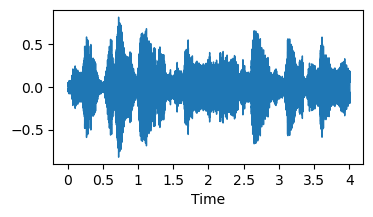

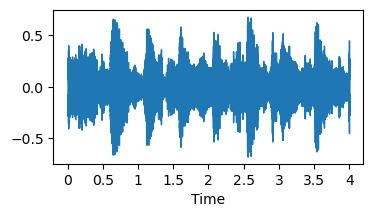

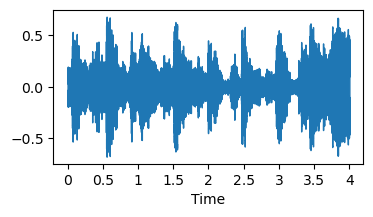

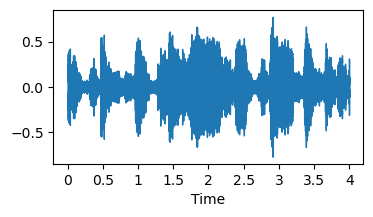

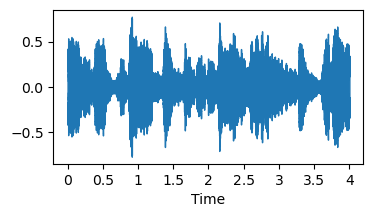

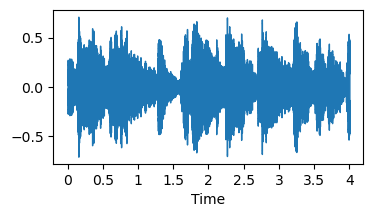

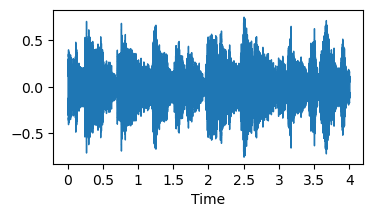

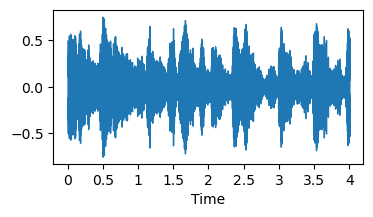

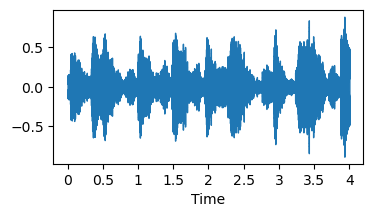

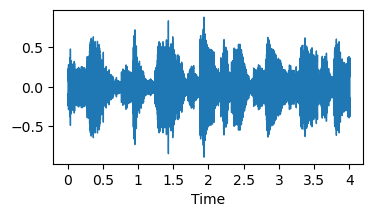

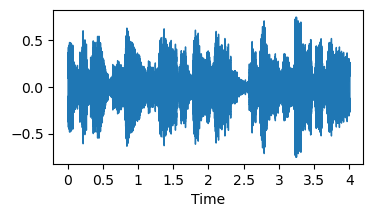

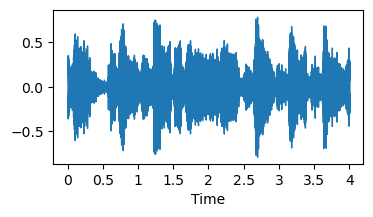

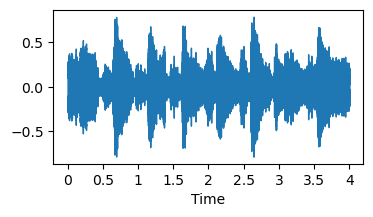

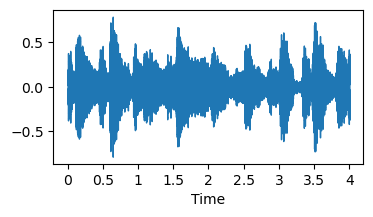

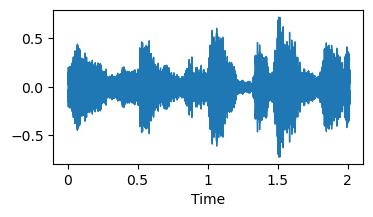

In [13]:
audio_path = "/Users/cartneyhlauffin/Downloads/Data/genres_original/blues/blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

In [15]:
#Plotting Melspectrogram of Entire Audio
def plot_melespectrogram(y,sr):
    #Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

In [17]:
random_file_name = "/Users/cartneyhlauffin/Downloads/Data/genres_original/blues/blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

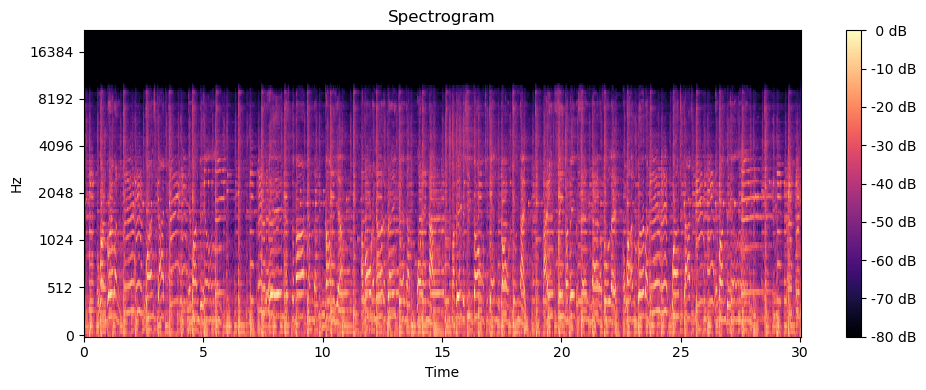

In [19]:
plot_melespectrogram(y,sr)

In [21]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

In [23]:
random_file_name = "/Users/cartneyhlauffin/Downloads/Data/genres_original/blues/blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

(128, 345)


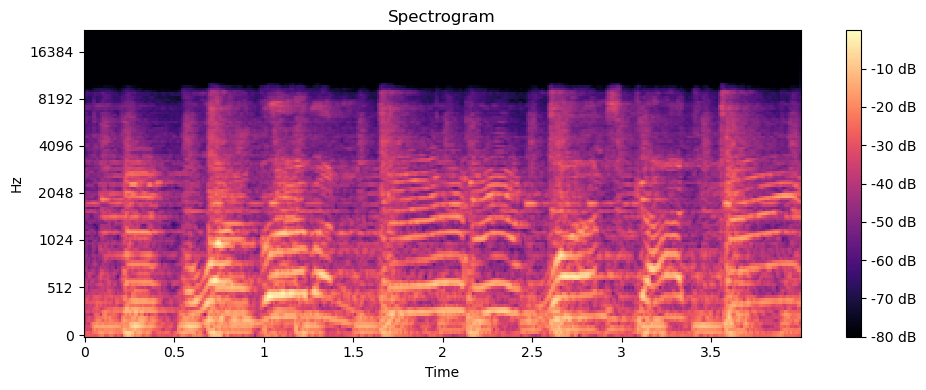

(128, 345)


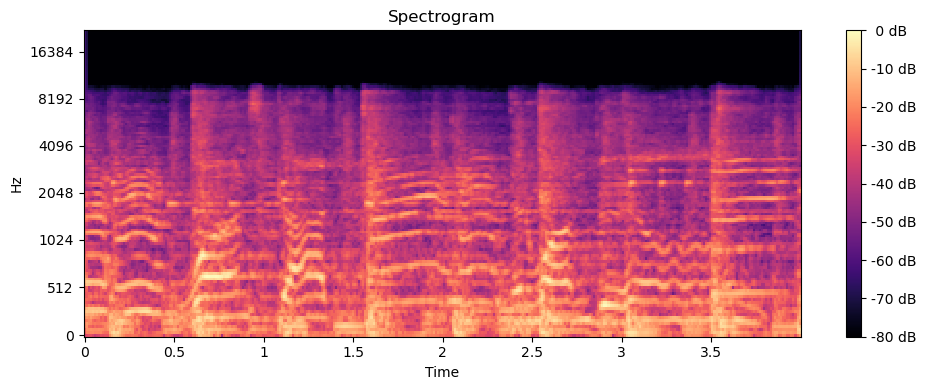

(128, 345)


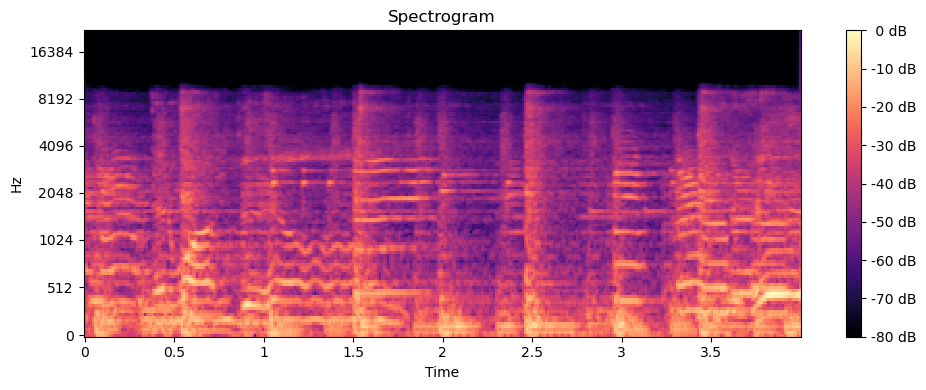

(128, 345)


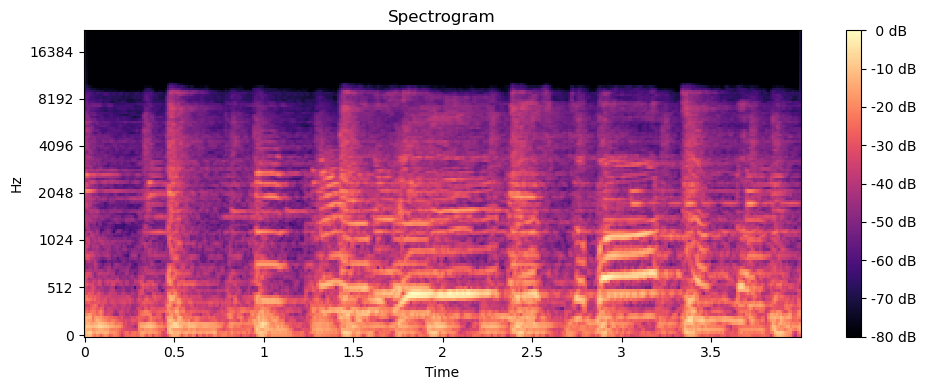

(128, 345)


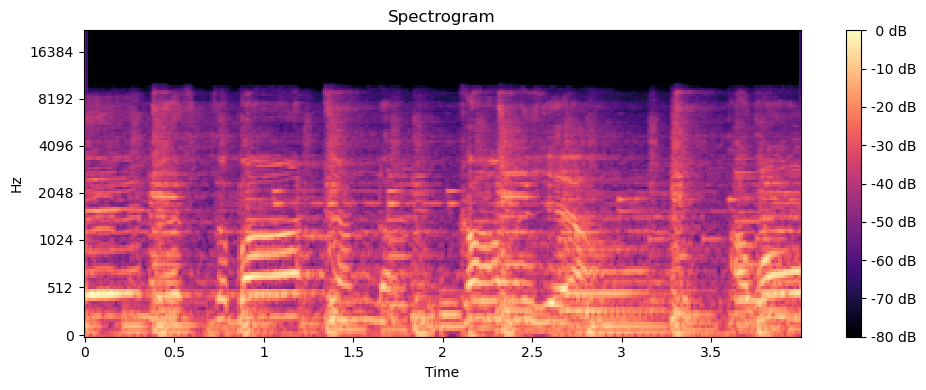

(128, 345)


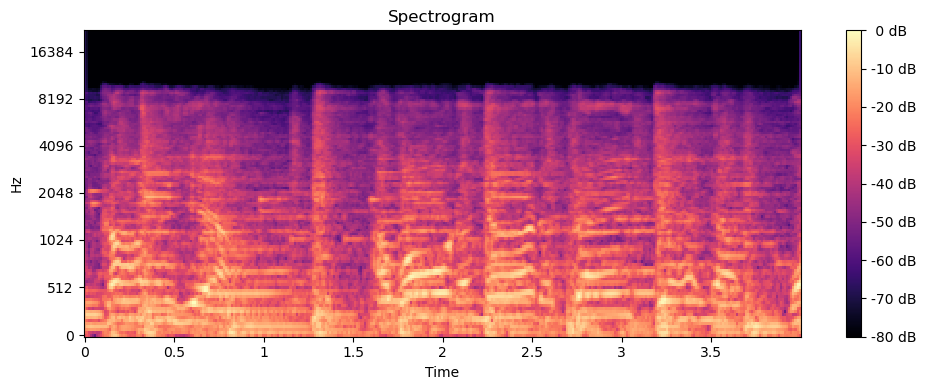

(128, 345)


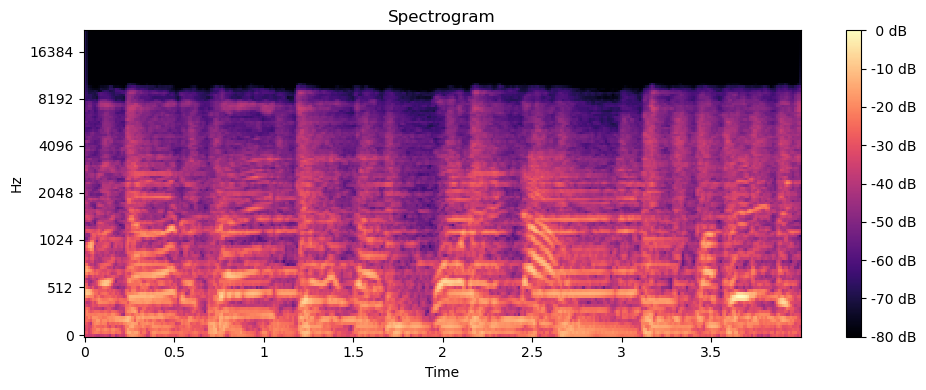

(128, 345)


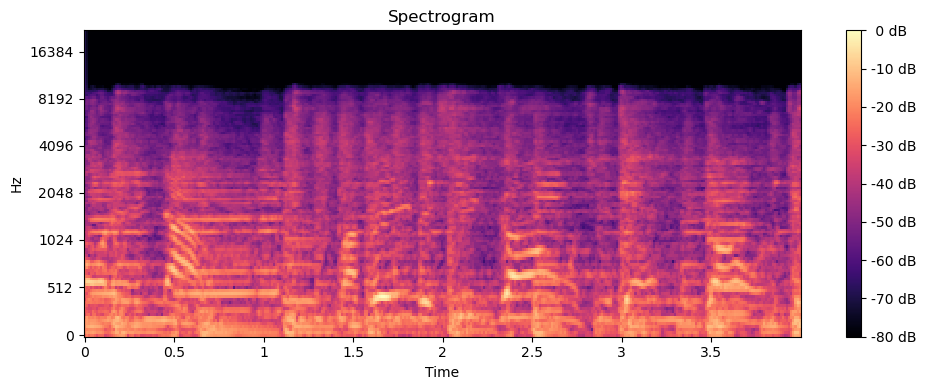

(128, 345)


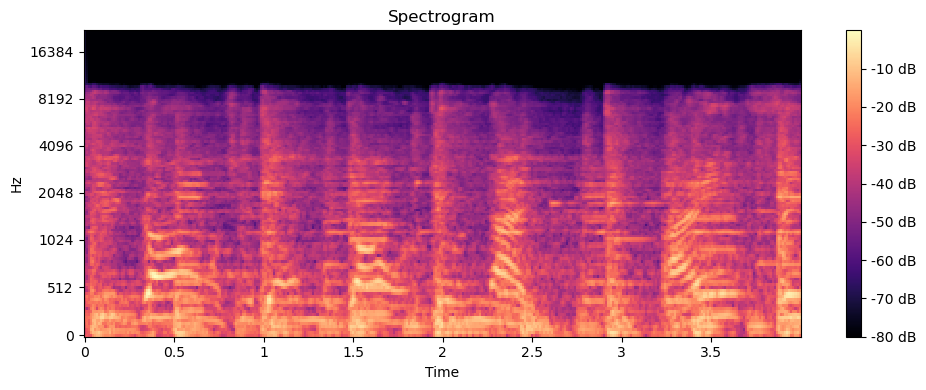

(128, 345)


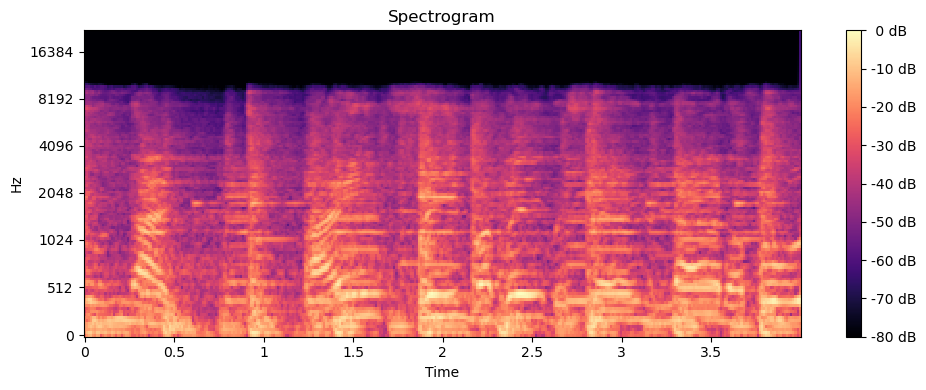

(128, 345)


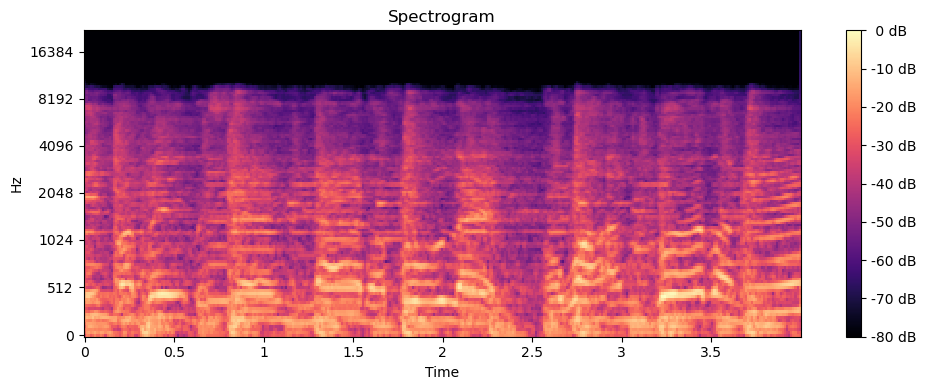

(128, 345)


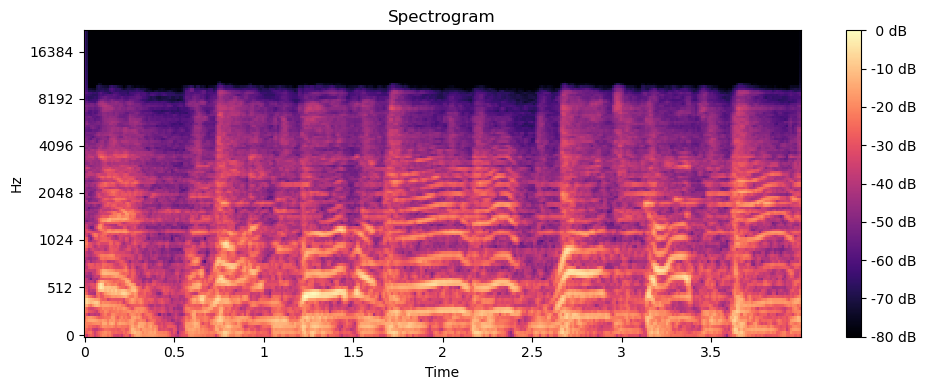

(128, 345)


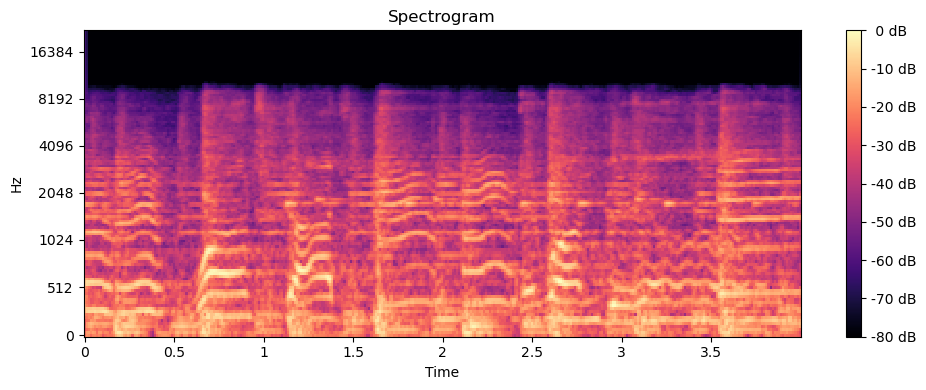

(128, 345)


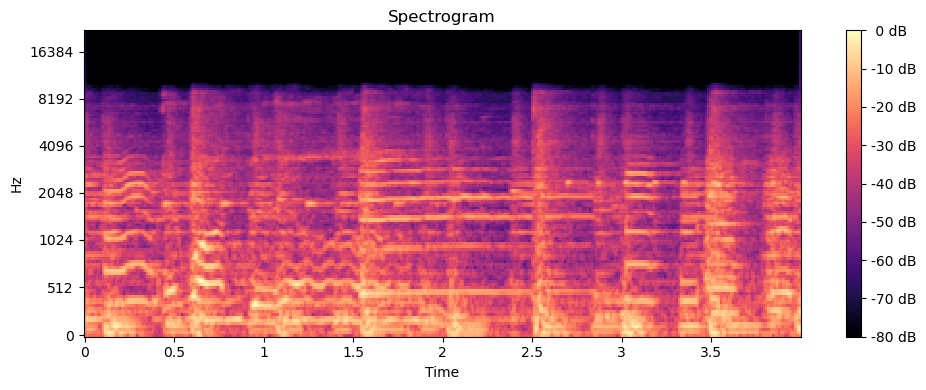

(128, 174)


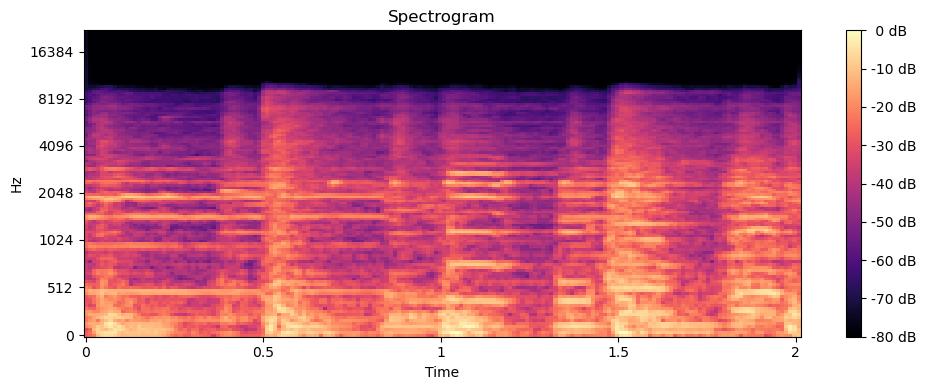

In [25]:
plot_melspectrogram_chunks(y,sr)

In [27]:
128*345

44160

In [29]:
210*210

44100

In [31]:
#define your folder structure
data_dir = "/Users/cartneyhlauffin/Downloads/Data/genres_original"
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [33]:

from tensorflow.image import resize
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)

In [35]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [36]:
data.shape

(14975, 150, 150, 1)

In [37]:
labels.shape

(14975,)

In [100]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl (252.7 MB)
Using cached keras-3.10.0-py3-none-any.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [tensorflow]2 [tensorflow]


In [41]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [43]:
labels.shape

(14975, 10)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [47]:
model = tf.keras.models.Sequential()

In [49]:
X_train[0].shape

(150, 150, 1)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input

model = Sequential()
model.add(Input(shape=X_train[0].shape))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [63]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [65]:
model.add(Dropout(0.3))

In [67]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [69]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [71]:
model.add(Dropout(0.3))

In [73]:
model.add(Flatten())

In [75]:
model.add(Dense(units=1200,activation='relu'))

In [77]:
model.add(Dropout(0.45))

In [79]:
#Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [81]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 74, 74, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 36, 36, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 17, 17, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │    30,106,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,738,170 (132.52 MB)

 Trainable params: 34,738,170 (132.52 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
#Compile the model
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [87]:
#Training Model
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 498s 1s/step - accuracy: 0.2506 - loss: 2.0708 - val_accuracy: 0.5119 - val_loss: 1.3880
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 492s 1s/step - accuracy: 0.5476 - loss: 1.3061 - val_accuracy: 0.6758 - val_loss: 0.9764
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.6781 - loss: 0.9430 - val_accuracy: 0.7402 - val_loss: 0.7622
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 488s 1s/step - accuracy: 0.7525 - loss: 0.7157 - val_accuracy: 0.8030 - val_loss: 0.5883
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 488s 1s/step - accuracy: 0.8033 - loss: 0.5778 - val_accuracy: 0.8254 - val_loss: 0.5317
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 490s 1s/step - accuracy: 0.8524 - loss: 0.4211 - val_accuracy: 0.8574 - val_loss: 0.4491
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.8869 - loss: 0.3334 - val_accuracy: 0.8588 - val_loss: 0.4516
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 491s 1s/step - accuracy: 0.9040 - loss: 0.2836 - val_accu

In [91]:
model.save("Trained_model.keras") #Mac

In [93]:
training_history.history

{'accuracy': [0.3550083339214325,
  0.577879786491394,
  0.6878964900970459,
  0.7631051540374756,
  0.8088480830192566,
  0.8545910120010376,
  0.8876460790634155,
  0.911352276802063,
  0.9320534467697144,
  0.9460768103599548,
  0.9511685967445374,
  0.9595993161201477,
  0.9595158696174622,
  0.9716193675994873,
  0.9757930040359497,
  0.9722036719322205,
  0.9744574427604675,
  0.9836394190788269,
  0.9764607548713684,
  0.9854757785797119,
  0.9844741225242615,
  0.9823873043060303,
  0.9861435890197754,
  0.9873956441879272,
  0.9886477589607239,
  0.9873956441879272,
  0.9898163676261902,
  0.9914023280143738,
  0.9823038578033447,
  0.9904841184616089],
 'loss': [1.800249457359314,
  1.218051791191101,
  0.9026790857315063,
  0.6907513737678528,
  0.5561352968215942,
  0.4178628921508789,
  0.33144497871398926,
  0.26787006855010986,
  0.19962099194526672,
  0.16753937304019928,
  0.14304837584495544,
  0.12808750569820404,
  0.12736640870571136,
  0.09039081633090973,
  0.077

In [95]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [97]:
X_train

array([[[[3.62469625e+00],
         [1.06304920e+00],
         [5.78081012e-01],
         ...,
         [7.72291412e+01],
         [4.75934067e+01],
         [1.37238369e+01]],

        [[6.16288300e+01],
         [1.11565689e+02],
         [1.24939743e+02],
         ...,
         [2.26904114e+02],
         [1.67433487e+02],
         [9.14233932e+01]],

        [[9.65764923e+01],
         [1.58142365e+02],
         [1.55722275e+02],
         ...,
         [2.27750198e+02],
         [3.04347015e+02],
         [1.79836227e+02]],

        ...,

        [[5.75669517e-04],
         [1.67717779e-04],
         [4.96678513e-05],
         ...,
         [8.38114138e-05],
         [8.60303917e-05],
         [1.59282630e-04]],

        [[5.21527778e-04],
         [1.09017717e-04],
         [2.23153393e-06],
         ...,
         [8.25771713e-06],
         [1.78673217e-05],
         [1.52539360e-04]],

        [[5.25240088e-04],
         [1.06741434e-04],
         [1.71574825e-07],
         ...,
 

In [101]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.keras")
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 74, 74, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 36, 36, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 17, 17, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │    30,106,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,214,512 (397.55 MB)

 Trainable params: 34,738,170 (132.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,476,342 (265.03 MB)

In [103]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [105]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [107]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 130s 345ms/step - accuracy: 0.9958 - loss: 0.0119


In [109]:
train_loss,train_accuracy

(0.011139421723783016, 0.9965776205062866)

In [111]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 349ms/step - accuracy: 0.9297 - loss: 0.2512


In [113]:
val_loss,val_accuracy

(0.28333428502082825, 0.9215359091758728)

In [115]:
training_history_data['val_loss']

[1.3879809379577637,
 0.9764328598976135,
 0.7622350454330444,
 0.5883111953735352,
 0.5317481160163879,
 0.44905325770378113,
 0.451581746339798,
 0.38260552287101746,
 0.33892297744750977,
 0.36987215280532837,
 0.3367624878883362,
 0.3399469554424286,
 0.34298276901245117,
 0.3095262348651886,
 0.3798789083957672,
 0.36037540435791016,
 0.3254355192184448,
 0.29932817816734314,
 0.32279613614082336,
 0.45408129692077637,
 0.30630847811698914,
 0.31064465641975403,
 0.3686562478542328,
 0.29272568225860596,
 0.48420780897140503,
 0.30295267701148987,
 0.2835955321788788,
 0.3493809700012207,
 0.25313666462898254,
 0.28333428502082825]

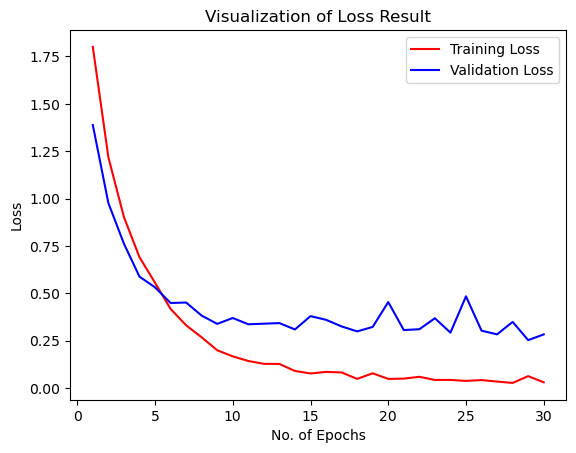

In [117]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

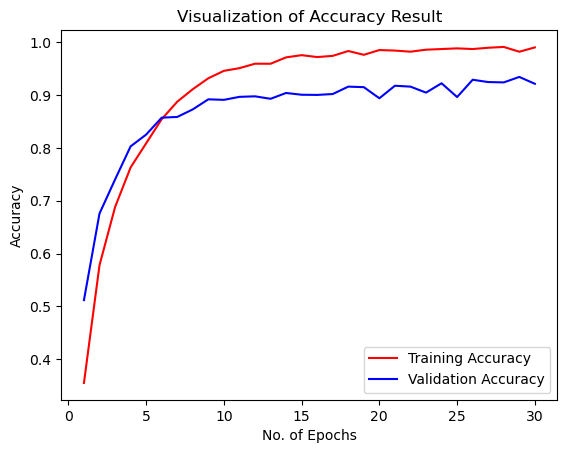

In [119]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [121]:
X_test.shape

(2995, 150, 150, 1)

In [123]:
y_pred = model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 351ms/step


array([[1.8618870e-05, 1.6450077e-11, 7.7984756e-04, ..., 9.9816060e-01,
        1.9202451e-04, 7.6949218e-04],
       [5.4742912e-07, 1.4860060e-08, 6.3370648e-03, ..., 2.5123336e-11,
        5.4616089e-07, 7.4001008e-01],
       [9.8247055e-09, 8.9855745e-10, 2.2009443e-09, ..., 4.5890769e-17,
        3.7005781e-15, 1.3170169e-05],
       ...,
       [9.8786968e-01, 4.9510058e-06, 6.0140989e-03, ..., 5.7245904e-07,
        1.7948814e-07, 9.3441787e-07],
       [1.5156871e-07, 9.9988544e-01, 2.3873606e-06, ..., 8.0742535e-07,
        9.5786754e-06, 4.3147593e-06],
       [5.7545708e-26, 0.0000000e+00, 0.0000000e+00, ..., 2.8405246e-27,
        3.4674498e-23, 0.0000000e+00]], dtype=float32)

In [125]:
y_pred.shape

(2995, 10)

In [127]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([7, 9, 6, ..., 0, 1, 4])

In [129]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
Y_test.shape

(2995, 10)

In [133]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4])

In [135]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [137]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.92      0.93      0.92       302
   classical       0.95      0.94      0.95       298
     country       0.96      0.84      0.89       317
       disco       0.98      0.85      0.91       312
      hiphop       0.94      0.96      0.95       277
        jazz       0.89      0.96      0.92       311
       metal       0.93      0.98      0.95       302
         pop       0.94      0.93      0.94       289
      reggae       0.91      0.93      0.92       296
        rock       0.83      0.90      0.86       291

    accuracy                           0.92      2995
   macro avg       0.92      0.92      0.92      2995
weighted avg       0.92      0.92      0.92      2995



In [139]:
cm

array([[281,   3,   2,   1,   0,   5,   0,   1,   3,   6],
       [  3, 281,   0,   0,   0,  13,   0,   0,   0,   1],
       [ 12,   2, 265,   2,   0,   8,   1,   2,   6,  19],
       [  1,   0,   3, 264,   7,   0,   5,   7,   7,  18],
       [  2,   0,   0,   0, 265,   0,   1,   2,   7,   0],
       [  3,   7,   1,   0,   0, 300,   0,   0,   0,   0],
       [  2,   0,   0,   0,   2,   0, 295,   0,   0,   3],
       [  0,   2,   2,   1,   7,   1,   0, 270,   2,   4],
       [  2,   1,   1,   0,   1,   8,   0,   3, 276,   4],
       [  0,   0,   3,   1,   1,   3,  15,   2,   3, 263]])

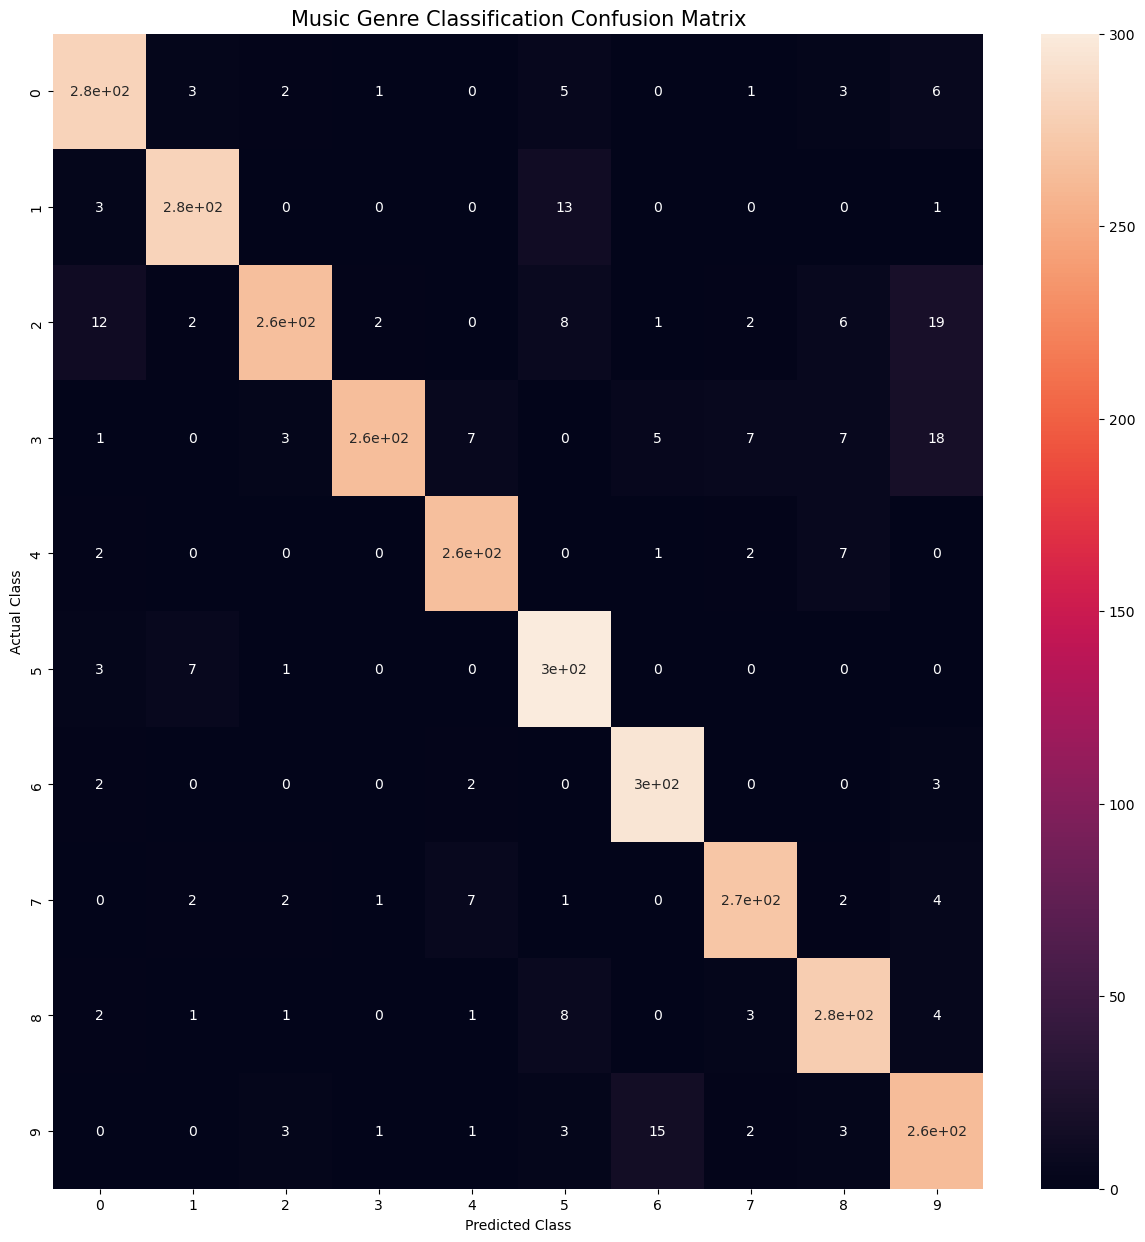

In [141]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()